## Michał Nowicki Project 2

Import necessary packages

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.model_selection import cross_val_score
import joblib
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

Import data to dataframes

In [2]:
# import data to pandas dataframe
X_train_df = pd.read_csv('X_train.csv')
Y_train_df = pd.read_csv('y_train.csv')
X_test_df = pd.read_csv('X_test.csv')

## Exercise 1

a) data overview

In [5]:
# print basic info about the data
X_train_df.describe()

,LINC01128,KLHL17,HES4,ISG15,AGRN,TNFRSF18,TNFRSF4,SDF4,B3GALT6,C1QTNF12,...,MT-ATP8,MT-ATP6,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB,AL592183.1
count,3794.000000,3794.000000,3794.000000,3794.000000,3794.000000,3794.000000,3794.000000,3794.000000,3794.000000,3794.000000,...,3794.000000,3794.000000,3794.000000,3794.000000,3794.000000,3794.000000,3794.000000,3794.000000,3794.000000,3794.000000
mean,0.063217,0.007522,0.041066,0.468205,0.002674,0.075237,0.095310,0.275954,0.062232,0.004861,...,0.612633,4.344697,4.254411,3.829557,1.323869,3.756150,2.593272,0.446651,3.764057,0.022220
std,0.276562,0.079887,0.221413,0.597643,0.045389,0.261760,0.311042,0.438533,0.213667,0.079632,...,0.619231,0.543225,0.525430,0.619833,0.760320,0.603455,0.705741,0.560066,0.687302,0.138186
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,4.060555,3.958606,3.556649,0.867802,3.458361,2.249085,0.000000,3.422970,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.657892,4.387511,4.250727,3.880838,1.365730,3.778676,2.629198,0.000000,3.842967,0.000000
75%,0.000000,0.000000,0.000000,0.858761,0.000000,0.000000,0.000000,0.610397,0.000000,0.000000,...,1.013453,4.671134,4.536643,4.158962,1.761209,4.081849,2.988313,0.825811,4.190763,0.000000
max,4.039216,1.882794,2.977715,5.607069,1.507100,3.141982,3.277842,3.891612,3.120419,3.349446,...,4.083617,7.827299,7.664850,7.645057,4.927896,7.119422,6.251504,4.106689,7.624864,3.331033


In [ ]:
Y_train_df.describe()

,Id,Expected
count,3794.000000,3794.000000
mean,1896.500000,1.012493
std,1095.377789,1.354493
min,0.000000,0.000000
25%,948.250000,0.092427
50%,1896.500000,0.252553
75%,2844.750000,2.335047
max,3793.000000,5.104848


In [ ]:
X_test_df.describe()

,LINC01128,KLHL17,HES4,ISG15,AGRN,TNFRSF18,TNFRSF4,SDF4,B3GALT6,C1QTNF12,...,MT-ATP8,MT-ATP6,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB,AL592183.1
count,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,...,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000,670.000000
mean,0.059704,0.008718,0.032537,0.427125,0.007074,0.076014,0.105799,0.258766,0.065149,0.005823,...,0.643298,4.339821,4.240867,3.851602,1.287851,3.779448,2.595023,0.459065,3.774788,0.038717
std,0.267264,0.080223,0.209361,0.543265,0.082565,0.262718,0.323870,0.402201,0.223349,0.084361,...,0.606568,0.545934,0.521934,0.574183,0.726349,0.558286,0.680742,0.555199,0.676154,0.206936
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,4.059339,3.955058,3.592447,0.859158,3.475462,2.235065,0.000000,3.468066,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.712344,4.391358,4.243552,3.888575,1.363213,3.804668,2.630123,0.000000,3.873173,0.000000
75%,0.000000,0.000000,0.000000,0.836118,0.000000,0.000000,0.000000,0.575785,0.000000,0.000000,...,1.074927,4.652993,4.553723,4.162984,1.722440,4.082815,3.002053,0.856491,4.183652,0.000000
max,2.991098,0.968891,2.255822,2.708612,1.507100,1.501121,1.876962,1.818262,1.534468,1.694605,...,3.693075,7.507866,7.344812,6.982979,4.927896,6.713603,5.921841,3.255681,6.472772,3.331033


In [ ]:
# check types of columns in X_train_df
floats_in_x_train = len(X_train_df.select_dtypes(include=['float64']).columns)
print(f'Floats in X train data: {floats_in_x_train}')

floats_in_y_train = len(Y_train_df.select_dtypes(include=['float64']).columns)
print(f'Floats in Y train data: {floats_in_y_train}')

floats_in_x_test = len(X_test_df.select_dtypes(include=['float64']).columns)
print(f'Floats in X test data: {floats_in_x_test}')


Floats in X train data: 9000
Floats in Y train data: 1
Floats in X test data: 9000


In [ ]:
# check for missing values
missing_values_in_x_train = X_train_df.isnull().sum().sum()
print(f'Missing values in X train data: {missing_values_in_x_train}')

missing_values_in_y_train = Y_train_df.isnull().sum().sum()
print(f'Missing values in Y train data: {missing_values_in_y_train}')

missing_values_in_x_test = X_test_df.isnull().sum().sum()
print(f'Missing values in X test data: {missing_values_in_x_test}')


Missing values in X train data: 0
Missing values in Y train data: 0
Missing values in X test data: 0


All datasets have no missing values and contain only float values. X Train data has 9000 columns and 3794 rows, Y Train data has 1 column and 3794 rows and X Test data has 9000 columns and 670 rows.

b) Y variable

histograms

In [ ]:
# make histogram for Y_train_df
have_exactly_0 = Y_train_df[Y_train_df['Expected'] == 0].shape[0]
print(f'Percent of 0 in Y train data: {have_exactly_0 / Y_train_df.shape[0] * 100}%')
px.histogram(Y_train_df, x='Expected', title='Histogram of Y train data', nbins=120)

Percent of 0 in Y train data: 21.50764364786505%


 From the histogram we can see that the data is not balanced, over 21% of the data is 0, and then after a little gap we can observe exponential like distribution of the data, execpt for a little cumulation around 3.15 .

In [ ]:
y_between_0_and_1 = Y_train_df[(Y_train_df['Expected'] > 0) & (Y_train_df['Expected'] < 1)]

# make kolmorogov-smirnov test for exponential distribution
from scipy.stats import kstest
from scipy.stats import expon
result = kstest(y_between_0_and_1['Expected'], expon.cdf)
print(f'Kolmogorov-Smirnov test for exponential distribution: {result}')

px.histogram(y_between_0_and_1, x='Expected', title='Histogram of Y train data between 0 and 1', nbins=100)

Kolmogorov-Smirnov test for exponential distribution: KstestResult(statistic=0.49031606191932287, pvalue=0.0, statistic_location=0.4713189005851745, statistic_sign=1)


In [ ]:
y_between_2and_5 = Y_train_df[(Y_train_df['Expected'] > 2) & (Y_train_df['Expected'] < 5)]

# make wilk test for normality
from scipy.stats import shapiro
stat, p = shapiro(y_between_2and_5)
print(f'Statistics={stat}, p={p}')
px.histogram(y_between_2and_5, x='Expected', title='Histogram of Y train data between 2 and 5', nbins=100)

Statistics=0.7627696618578371, p=5.427723956054619e-47


after a closer look at the data, based on the test's p-value, we can reject hypothesis about normality of the data or exponential distribution

kernel density:

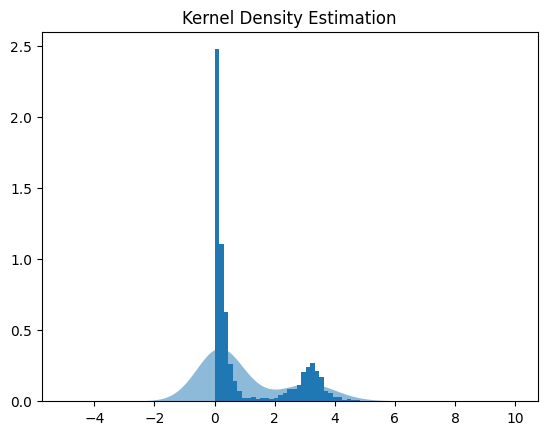

In [3]:
from sklearn.neighbors import KernelDensity

kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(Y_train_df['Expected'].values.reshape(-1, 1))

X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]
bins = np.linspace(-5, 10, 100)
log_dens = kde.score_samples(X_plot)
plt.fill_between(X_plot[:, 0], np.exp(log_dens), alpha=0.5)
plt.hist(Y_train_df['Expected'], bins=bins, density=True)
plt.title('Kernel Density Estimation')
plt.show()

Gaussian kernel density estimation doen't work well for this data

In [ ]:
Y_train_df['Expected'].describe()

count    3794.000000
mean        1.012493
std         1.354493
min         0.000000
25%         0.092427
50%         0.252553
75%         2.335047
max         5.104848
Name: Expected, dtype: float64

from the description we can learn that standard deviation is 1.35 and mean is 1.01

c) most corelated variables

In [ ]:
# sprt columns in X_train_df ragarding to correlation with Y_train_df
correlation = X_train_df.corrwith(Y_train_df['Expected'])
# take absolute values
correlation = correlation.abs()
correlation = correlation.sort_values(ascending=False)
correlation = correlation.dropna()
correlation = correlation[0:250]
correlation

S100A9    0.699401
CD36      0.698006
FCN1      0.691884
S100A8    0.690121
LYZ       0.673539
            ...   
SNX3      0.408305
HBQ1      0.407918
IL7R      0.407740
BPGM      0.406776
RPL41     0.406727
Length: 250, dtype: float64

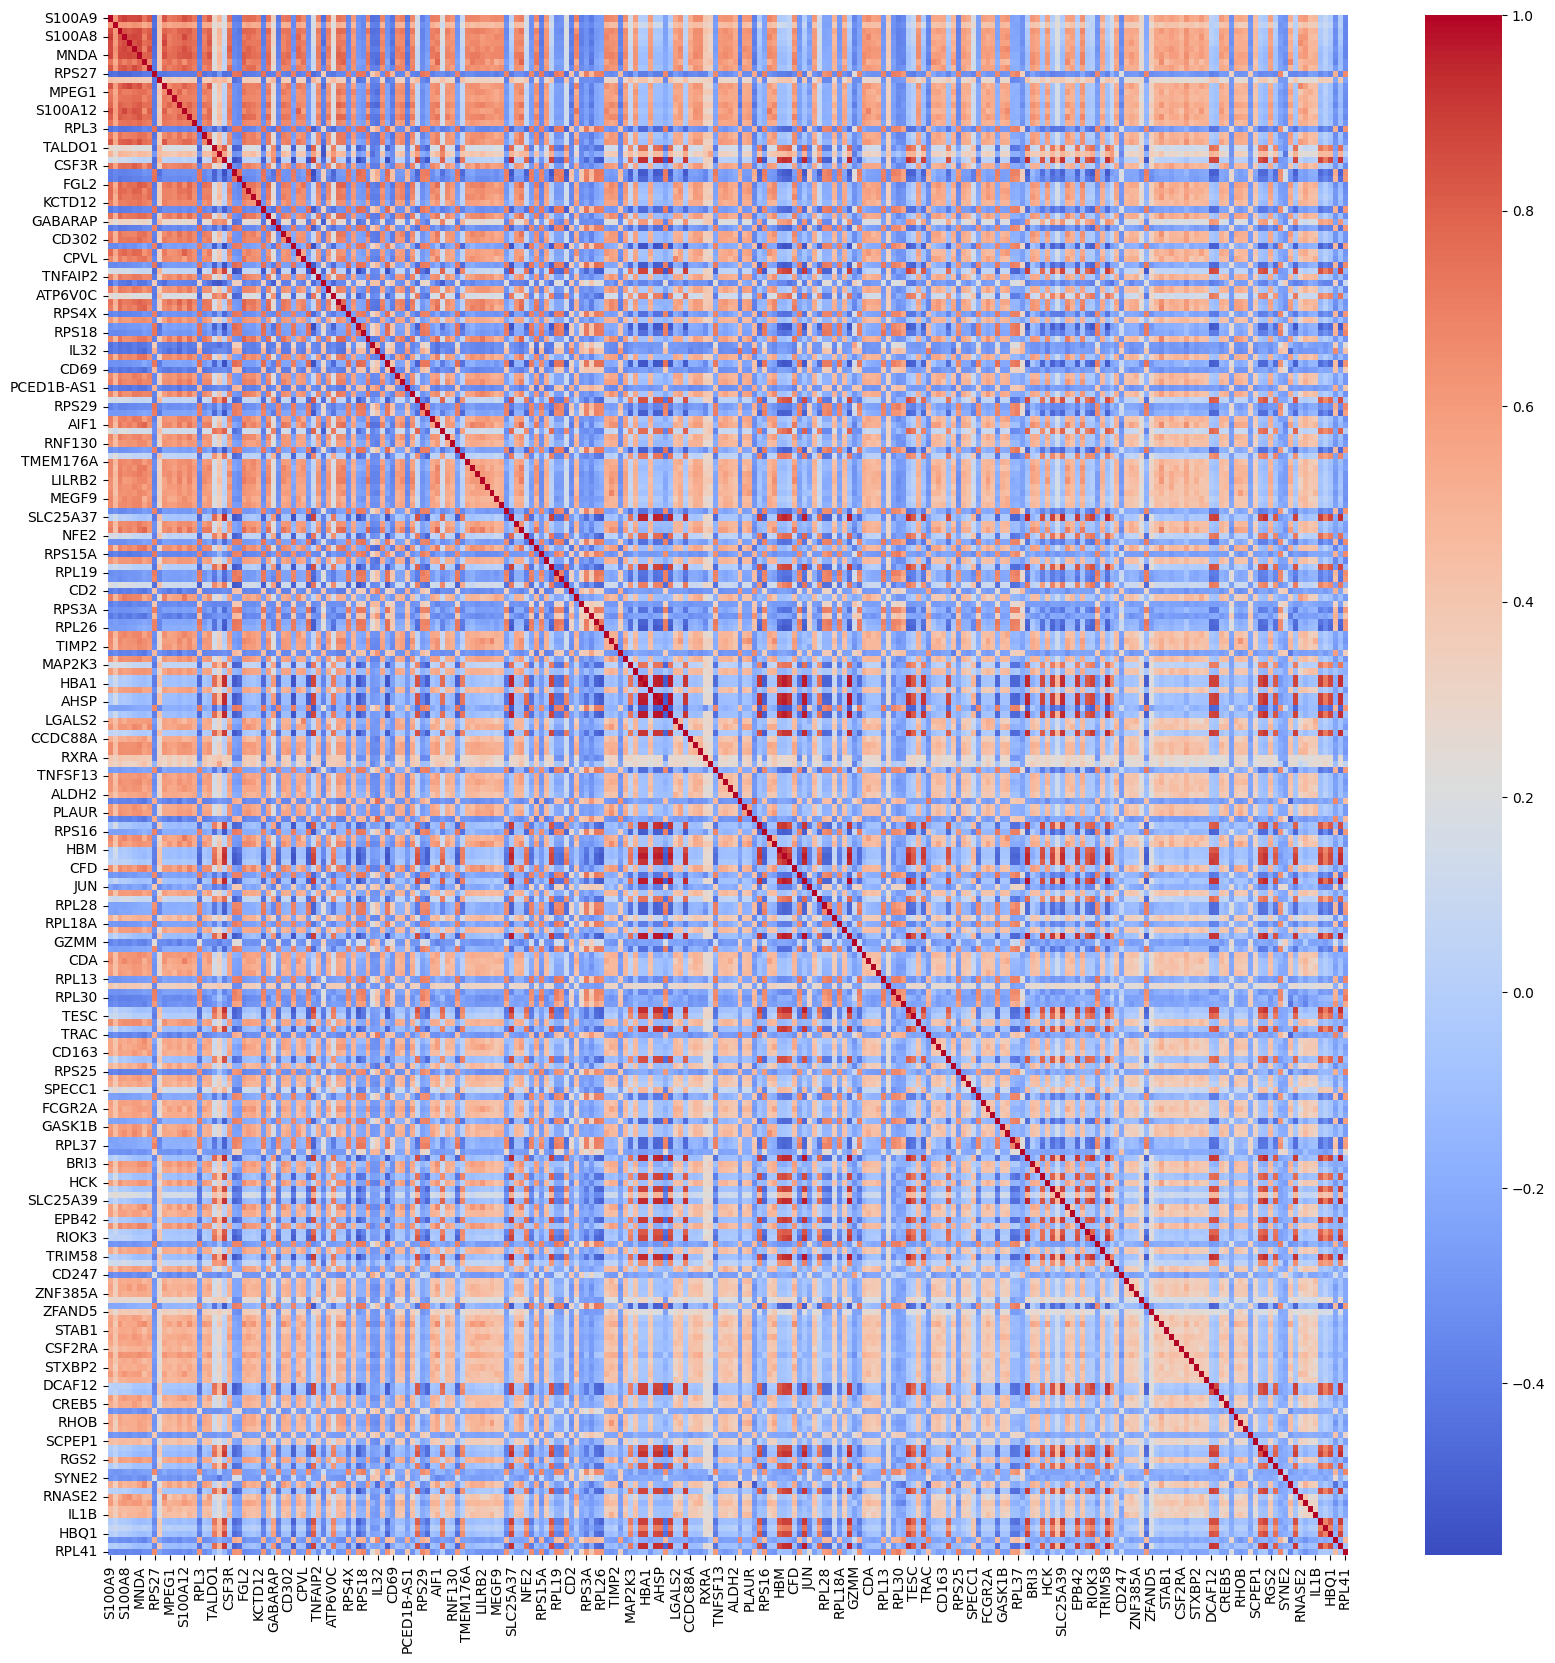

In [ ]:
plt.figure(figsize=(20, 20))
heatmap = sns.heatmap(X_train_df[correlation.index].corr(), annot=False, cmap='coolwarm')

This grid-like pattern suggests that there are clusters of genes that expresses similar things. Some clusters have positive correlation with each other and some have negative.

## Excercise 2 - ElasticNet

a) Elastinc net is a linear regression-based prediction method that combines ridge regression and lasso. The ElasticNet training process consists of estimating coefficients known from linear regression and minimizing a penalty function based on the sum of the first and second norms of the coefficient vector, weighted according to the l1_ratio parameter or $\lambda$ parameters. The minimized function has from: 
$$ ||y - X\beta ||^2 + \lambda_2||\beta||^2 + \lambda_1||\beta_1||_1$$

where $\lambda_1$ and $\lambda_2$ are hyperparameters corresponding to the contribution of lasso and ridge regression. For $\lambda_1 = 0$ and $\lambda_2 \neq 0 $ we get ridge regression, for $\lambda_1 \neq 0$ and $\lambda_2 = 0 $ we get lasso, if both parameters are $0$ we get OSL. The ElasticNetCV class uses the parameters l1_ratio (for l1_ratio = 1 ElasticNet degenerates to lasso) and $\alpha$ multiplied by l1_ratio or $1 -$ l1_ratio

b) Firstly we normalize data for elastic net, this is important because if we omit this step with a model that penalizes larger coefficients, such as ElasticNet, we could find ourselves in a situation where we omit a statistically significant predictor just because it deviates in scale from the others.

In [6]:
# standardize data

scaler = StandardScaler()
X_train_df_standardized = scaler.fit_transform(X_train_df)
X_train_df_standardized = pd.DataFrame(X_train_df_standardized, columns=X_train_df.columns)

X_test_df_standardized = scaler.transform(X_test_df)
X_test_df_standardized = pd.DataFrame(X_test_df_standardized, columns=X_test_df.columns)

Attempt to reduce dimensions by PCA

In [24]:
# make PCA
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train_df_standardized)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)
px.line(x=np.arange(1, len(cumulative_explained_variance_ratio) + 1), y=cumulative_explained_variance_ratio, title='Cumulative explained variance ratio')


In [31]:
# make elbow plot
px.line(x=np.arange(1, 100), y=explained_variance_ratio[0:99], title='Explained variance ratio')

Looking at both charts, we see that the first 10 directions of greatest variance, which are statistically interesting, explain only about 10% of the variance. We could choose to take the first 3000 axes, which explain more than 90% of the variance, but such an approach would have no statistical basis because the learning set itself contains less than 4000 items, so we have no reason to believe that this procedure for new data would also produce similar results with such a large number of dimensions. An additional disadvantage of the PCA method is the assumption of linear relationships between the predictors, so the final decision is not to reduce the dimension.

Make a cross validation subdivision, this KFold will be used for all models. The choice of the number of subsets with the cross-validation procedure was motivated by considerations of computational efficiency and the standard rule of thumb for 5 subsets.

In [3]:
# make cross validation subdivison CV splitter

kf = KFold(n_splits=5, shuffle=True, random_state=42)


Defining a grid of parameters.



Selection of ``l1_ratio`` parameters in the grid I started with a linear spread of 10 values from 0.1 to 1.0, gradually adding new values at a higher density around the parameter that the cross-validation procedure considered best. I initially ceded the selection of the $\alpha$ parameter to the ElasticNetCV procedure, but then decided on 100 linearly distributed values in the range from 0 to 1, since values outside this range were significantly worse.

In [32]:
# train elastic net model



l1_ratios = np.linspace(0.1, 1, 5, endpoint=True) 
# append [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1] to l1_ratios
l1_ratios = np.append(l1_ratios, np.linspace(0.01, 0.1, 5, endpoint=False))
l1_ratios = np.append(l1_ratios, np.linspace(0.08, 0.1, 5, endpoint=False))
l1_ratios = np.append(l1_ratios, np.linspace(0.02, 0.04, 5, endpoint=False))
l1_ratios = np.append(l1_ratios, np.linspace(0.06, 0.08, 5, endpoint=False))
# sort l1_ratios
l1_ratios = np.sort(l1_ratios)
alphas = np.linspace(0.01, 1, 100, endpoint=True)
model = ElasticNetCV(l1_ratio=l1_ratios, alphas=alphas, cv=kf, n_jobs=-1, verbose=True, tol=0.001, max_iter=1000, selection='cyclic')
model.fit(X_train_df_standardized, Y_train_df['Expected'])

# print information about model
print(f'Best alpha: {model.alpha_}')
print(f'Best l1 ratio: {model.l1_ratio_}')
print(f'Number of iterations: {model.n_iter_}')
print(f'Number of features: {len(model.coef_)}')
print(f'Number of non-zero features: {len(model.coef_[model.coef_ != 0])}')
# print mean cross validation score
print(f'Mean cross validation score: {model.mse_path_.mean()}')
# predict values
Predicted = model.predict(X_train_df_standardized)
# calculate mean squared error
mse = mean_squared_error(Y_train_df['Expected'], Predicted)
print(f'Mean squared error for train data: {mse}')

model.score(X_train_df_standardized, Y_train_df['Expected'])

# save model to the file
joblib.dump(model, 'ElasticNet1.pkl')


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

Best alpha: 0.04
Best l1 ratio: 0.325
Number of iterations: 488
Number of features: 9000
Number of non-zero features: 416
Mean cross validation score: 0.2266903447671466
Mean squared error for train data: 0.09156740123658043


['ElasticNet1.pkl']

In [ ]:
import joblib
model = joblib.load('model2.pkl')
print(f'Best alpha: {model.alpha_}')
print(f'Best l1 ratio: {model.l1_ratio_}')
print(f'Number of iterations: {model.n_iter_}')
print(f'Number of features: {len(model.coef_)}')
print(f'Number of non-zero features: {len(model.coef_[model.coef_ != 0])}')
# print mean cross validation score
print(f'Mean cross validation score: {model.mse_path_.mean()}')
# predict values
Predicted = model.predict(X_train_df_standardized)
# calculate mean squared error
mse = mean_squared_error(Y_train_df['Expected'], Predicted)
# print(Y_train_df['Expected'])
# print(Predicted)
print(f'Mean squared error for train data: {mse}')

# R2 score
model.score(X_train_df_standardized, Y_train_df['Expected'])


Best alpha: 0.11
Best l1 ratio: 0.096
Number of iterations: 667
Number of features: 9000
Number of non-zero features: 658
Mean cross validation score: 0.22231399531748067
0       0.142247
1       3.113165
2       1.312722
3       0.130133
4       3.186283
          ...   
3789    0.176859
3790    0.103691
3791    3.286398
3792    0.000000
3793    0.000000
Name: Expected, Length: 3794, dtype: float64
[0.35992787 3.00225778 0.30650871 ... 3.59270298 0.22889574 0.12301011]
Mean squared error for train data: 0.08278674828683467


0.9548641627617751

The training error of the model was: 0.0828
</br>
The averaged valdian error was: 0.222
</br>
The $R^2$ was 0.954
</br>
As we might have suspected, the training error is much smaller than the validation error, we can expect that our model does not have too much bias

## Exercise 3 Random forests

First grid search witch smaller max_features values

In [31]:
# define parameter grid for random forest
max_depth = [2, 4, 8, 16, 32, 64, 128, 256]
max_features = [5, 'log2', 'sqrt', 700, 0.1]
n_estimators = [5, 10, 20, 50, 100, 200, 300, 400]

# make 3 dim dict for storing results
results = {}
for i in max_depth:
    results[i] = {}
    for j in max_features:
        results[i][j] = {}


best_model = None
min_mse = 10000000

# train random forest model
for dept in max_depth:
    for n_features in max_features:
        for n_est in n_estimators:
            results[dept][n_features][n_est] = 0
            for i, (train_index, test_index) in enumerate(kf.split(X_train_df_standardized)):
                X_train, X_test = X_train_df_standardized.iloc[train_index], X_train_df_standardized.iloc[test_index]
                y_train, y_test = Y_train_df.iloc[train_index], Y_train_df.iloc[test_index]
                model = RandomForestRegressor(max_depth=dept, max_features=n_features, n_estimators=n_est, n_jobs=-1)
                model.fit(X_train, y_train["Expected"])
                Predicted = model.predict(X_test)
                mse = mean_squared_error(y_test["Expected"], Predicted)
                # print(f'Mean squared error for {dept} depth, {n_features} features and {n_est} estimators: {mse}')
                results[dept][n_features][n_est] += mse
            results[dept][n_features][n_est] /= 5
            if results[dept][n_features][n_est] < min_mse:
                min_mse = results[dept][n_features][n_est]
                best_model = model
            print(f'Mean squared error for {dept} depth, {n_features} features and {n_est} estimators: {results[dept][n_features][n_est]}')

# print best model
# save model to the file
joblib.dump(best_model, 'random_forest_v1.pkl')

# save results to the file
joblib.dump(results, 'results_random_forests.pkl')


Mean squared error for 2 depth, 5 features and 5 estimators: 1.3305695612756823
Mean squared error for 2 depth, 5 features and 10 estimators: 1.3171285352681141
Mean squared error for 2 depth, 5 features and 20 estimators: 1.3061528128306543
Mean squared error for 2 depth, 5 features and 50 estimators: 1.2661433987409867
Mean squared error for 2 depth, 5 features and 100 estimators: 1.2672168030153208
Mean squared error for 2 depth, 5 features and 200 estimators: 1.2646495467826397
Mean squared error for 2 depth, 5 features and 300 estimators: 1.2623213444721857
Mean squared error for 2 depth, 5 features and 400 estimators: 1.2652610724246434
Mean squared error for 2 depth, log2 features and 5 estimators: 1.0171260764879766
Mean squared error for 2 depth, log2 features and 10 estimators: 0.9618682034627414
Mean squared error for 2 depth, log2 features and 20 estimators: 0.9114531651526316
Mean squared error for 2 depth, log2 features and 50 estimators: 0.9667629646415259
Mean squared e

['results_random_forests.pkl']

I decided to split CV for random forests into 2 separate cells, because training with more max_features took substantially more time.

In [33]:
# define parameter grid for random forest
max_depth = [2, 4, 8, 16, 32, 64, 128, 256]
max_features = [0.2, 0.5, 0.7]
n_estimators = [5, 10, 20, 50, 100, 200, 300]

# make 3 dim dict for storing results
results = {}
for i in max_depth:
    results[i] = {}
    for j in max_features:
        results[i][j] = {}


best_model2 = None
min_mse2 = 10000000

# train random forest model
for dept in max_depth:
    for n_features in max_features:
        for n_est in n_estimators:
            results[dept][n_features][n_est] = 0
            for i, (train_index, test_index) in enumerate(kf.split(X_train_df_standardized)):
                X_train, X_test = X_train_df_standardized.iloc[train_index], X_train_df_standardized.iloc[test_index]
                y_train, y_test = Y_train_df.iloc[train_index], Y_train_df.iloc[test_index]
                model = RandomForestRegressor(max_depth=dept, max_features=n_features, n_estimators=n_est, n_jobs=-1)
                model.fit(X_train, y_train["Expected"])
                Predicted = model.predict(X_test)
                mse = mean_squared_error(y_test["Expected"], Predicted)
                # print(f'Mean squared error for {dept} depth, {n_features} features and {n_est} estimators: {mse}')
                results[dept][n_features][n_est] += mse
            results[dept][n_features][n_est] /= 5
            if results[dept][n_features][n_est] < min_mse:
                min_mse = results[dept][n_features][n_est]
                best_model = model
            print(f'Mean squared error for {dept} depth, {n_features} features and {n_est} estimators: {results[dept][n_features][n_est]}')

# print best model
# save model to the file
joblib.dump(best_model, 'random_forest_v2.pkl')

# save results to the file
joblib.dump(results, 'results_random_forests_v2.pkl')

Mean squared error for 2 depth, 0.2 features and 5 estimators: 0.2631308776115581
Mean squared error for 2 depth, 0.2 features and 10 estimators: 0.24546295519193148
Mean squared error for 2 depth, 0.2 features and 20 estimators: 0.2296845784719308
Mean squared error for 2 depth, 0.2 features and 50 estimators: 0.2173873916308932
Mean squared error for 2 depth, 0.2 features and 100 estimators: 0.2281818771209727
Mean squared error for 2 depth, 0.2 features and 200 estimators: 0.22581118972996284
Mean squared error for 2 depth, 0.2 features and 300 estimators: 0.22650914082720192
Mean squared error for 2 depth, 0.5 features and 5 estimators: 0.2593140113384952
Mean squared error for 2 depth, 0.5 features and 10 estimators: 0.260146119255099
Mean squared error for 2 depth, 0.5 features and 20 estimators: 0.23606952427884273
Mean squared error for 2 depth, 0.5 features and 50 estimators: 0.2315257763041477
Mean squared error for 2 depth, 0.5 features and 100 estimators: 0.2313729708760591

['results_random_forests_v2.pkl']

In [35]:
# calculate mean squared error for best model
Predicted = best_model.predict(X_train_df_standardized)
mse = mean_squared_error(Y_train_df['Expected'], Predicted)
print(f'Mean squared error for best random forest model: {mse}')

Mean squared error for best random forest model: 0.05144691428259871


Compare elastic net model with random forest model


In [22]:
best_elastic_net = joblib.load('ElasticNet1.pkl')

random_forest_results = joblib.load('results_random_forests_v2.pkl')
random_forest_results2 = joblib.load('results_random_forests.pkl')

best_random_forest_mse = 1000
best_random_forest_mse2 = 1000

for key in random_forest_results.keys():
        for key2 in random_forest_results[key].keys():
                for key3 in random_forest_results[key][key2].keys():
                        if random_forest_results[key][key2][key3] < best_random_forest_mse:
                                best_random_forest_mse = random_forest_results[key][key2][key3]

for key in random_forest_results2.keys():
        for key2 in random_forest_results2[key].keys():
                for key3 in random_forest_results2[key][key2].keys():
                        if random_forest_results2[key][key2][key3] < best_random_forest_mse2:
                                best_random_forest_mse2 = random_forest_results2[key][key2][key3]

if best_random_forest_mse2 < best_random_forest_mse:
        best_random_forest = joblib.load('random_forest_v1.pkl')
        best_random_forest_mse = best_random_forest_mse2
else:
        best_random_forest = joblib.load('random_forest_v2.pkl')


# make reference model
y_mean = Y_train_df['Expected'].mean()
Predicted = np.full(Y_train_df['Expected'].shape, y_mean)
mse_ref = mean_squared_error(Y_train_df['Expected'], Predicted)

# make table with comparison of models
models = ['Elastic Net', 'Random Forest', 'Reference']
mse = [mean_squared_error(Y_train_df['Expected'], best_elastic_net.predict(X_train_df_standardized)),
       mean_squared_error(Y_train_df['Expected'], best_random_forest.predict(X_train_df_standardized)),
       mse_ref]
r2 = [best_elastic_net.score(X_train_df_standardized, Y_train_df['Expected']),
        best_random_forest.score(X_train_df_standardized, Y_train_df['Expected']),
        0]

comparison = pd.DataFrame({'Model': models, 'Mean Squared Error': mse, 'R2': r2, 'MSE CV': [best_elastic_net.mse_path_.mean(),
                                                                                             best_random_forest_mse,
                                                                                             mse_ref]})

# print max depth of random forest
print(f'Max depth of random forest: {best_random_forest.max_depth}')
# print max features
print(f'Max features of random forest: {best_random_forest.max_features}')
# print number of estimators
print(f'Number of estimators of random forest: {best_random_forest.n_estimators}')

print('---------------------')
# print alpha of elastic net
print(f'Alpha of elastic net: {best_elastic_net.alpha_}')
# print l1 ratio of elastic net
print(f'L1 ratio of elastic net: {best_elastic_net.l1_ratio_}')
# print number of features
print(f'Number of features of elastic net: {len(best_elastic_net.coef_.nonzero()[0])}')
comparison



Max depth of random forest: 16
Max features of random forest: 0.2
Number of estimators of random forest: 300
---------------------
Alpha of elastic net: 0.04
L1 ratio of elastic net: 0.325
Number of features of elastic net: 416


,Model,Mean Squared Error,R2,MSE CV
0,Elastic Net,0.091567,0.950077,0.226690
1,Random Forest,0.051447,0.971951,0.106618
2,Reference,1.834169,0.000000,1.834169


The comparison shows that the random forest proved to be a better regression tool. In addition to a better cross validation score, it also showed a smaller mean squared error for the training set. An interesting observation is the relatively low value of the L1 ratio, it speaks to the fact that ElasticNet took a turn towards ridge regression, so we are entitled to believe that a sizable portion of the predictors from the training set have a significant effect on the explanatory variable.

## Excercise 4  XGBoost

First grid search. Gives an idea of the approximate values of the hyperparameters

In [6]:
# prepare data for XGBoost
dtrain = xgb.DMatrix(X_train_df_standardized, label=Y_train_df['Expected'])
# fit the model
etas = [0, 0.1, 0.3, 0.5, 0.7, 0.9]
max_depth = [4, 6, 8, 10]
subsamples = [0.1, 0.3, 0.5, 0.7, 0.9]
gammas = [0, 100, 1000, 10000] 
num_round = 20
results = {}
best_model = None
min_mse = 10000000
# populate results dict
for i in etas:
    results[i] = {}
    for j in max_depth:
        results[i][j] = {}
        for k in subsamples:
            results[i][j][k] = {}
            for l in gammas:
                results[i][j][k][l] = 0

# train XGBoost model
for eta in etas:
    for depth in max_depth:
        for subsample in subsamples:
            for gamma in gammas:
                for i, (train_index, test_index) in enumerate(kf.split(X_train_df_standardized)):
                    X_train, X_test = X_train_df_standardized.iloc[train_index], X_train_df_standardized.iloc[test_index]
                    y_train, y_test = Y_train_df.iloc[train_index], Y_train_df.iloc[test_index]
                    dtrain = xgb.DMatrix(X_train, label=y_train['Expected'])
                    dtest = xgb.DMatrix(X_test, label=y_test['Expected'])

                    param = {'max_depth': depth, 'eta': eta, 'objective': 'reg:squarederror', 'subsample': subsample, 'gamma': gamma, 'device': 'cuda'}
                    xgb_reg = xgb.train(param, dtrain, num_round)
                    Predicted = xgb_reg.predict(dtest)
                    mse = mean_squared_error(y_test['Expected'], Predicted)
                    results[eta][depth][subsample][gamma] += mse
                results[eta][depth][subsample][gamma] /= 5
                if results[eta][depth][subsample][gamma] < min_mse:
                    min_mse = results[eta][depth][subsample][gamma]
                    best_model = xgb_reg
                print(f'Mean squared error for eta={eta}, depth={depth}, subsample={subsample}, gamma={gamma}: {results[eta][depth][subsample][gamma]}')

# save results to the file
joblib.dump(results, 'results_xgboost_v1.pkl')
# save best model to the file
joblib.dump(best_model, 'xgboost_v1.pkl')



KeyboardInterrupt: 

Extracting best hyperparameters for Xgb from saved dictionary.

In [7]:
# load results from the file and find best model
results = joblib.load('results_xgboost_v1.pkl')
min_mse = 10000000
best_model = None
for eta in results:
    for depth in results[eta]:
        for subsample in results[eta][depth]:
            for gamma in results[eta][depth][subsample]:
                if results[eta][depth][subsample][gamma] < min_mse:
                    min_mse = results[eta][depth][subsample][gamma]
                    best_params = {'eta': eta, 'depth': depth, 'subsample': subsample, 'gamma': gamma}

# print best model
print(f'Best model for XGBoost: {best_params}')

Best model for XGBoost: {'eta': 0.3, 'depth': 4, 'subsample': 0.9, 'gamma': 0}


More precise grid search, with linear distribution of parameters

In [9]:
# train XGBoost model using GridSearchCV
param_grid = {
    'max_depth': [3, 4, 6],
    'eta': [0.2 ,0.3 ,0.4, 0.7],
    'subsample': [0.3, 0.5, 0.9],
    'gamma': [0, 10, 40, 70],
    'lambda': [0, 0.2, 2]
}

xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', device='cuda')
grid_search = GridSearchCV(xgb_reg, param_grid, cv=kf, verbose=3)
grid_search.fit(X_train_df_standardized, Y_train_df['Expected'])

# save best model to the file
joblib.dump(grid_search, 'xgboost_grid_search.pkl')

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV 1/5] END eta=0.2, gamma=0, lambda=0, max_depth=3, subsample=0.3;, score=0.910 total time=  22.0s
[CV 2/5] END eta=0.2, gamma=0, lambda=0, max_depth=3, subsample=0.3;, score=0.911 total time=  21.1s
[CV 3/5] END eta=0.2, gamma=0, lambda=0, max_depth=3, subsample=0.3;, score=0.936 total time=  20.8s
[CV 4/5] END eta=0.2, gamma=0, lambda=0, max_depth=3, subsample=0.3;, score=0.908 total time=  21.0s
[CV 5/5] END eta=0.2, gamma=0, lambda=0, max_depth=3, subsample=0.3;, score=0.912 total time=  21.0s
[CV 1/5] END eta=0.2, gamma=0, lambda=0, max_depth=3, subsample=0.5;, score=0.909 total time=  21.0s
[CV 2/5] END eta=0.2, gamma=0, lambda=0, max_depth=3, subsample=0.5;, score=0.924 total time=  21.3s
[CV 3/5] END eta=0.2, gamma=0, lambda=0, max_depth=3, subsample=0.5;, score=0.946 total time=  21.8s
[CV 4/5] END eta=0.2, gamma=0, lambda=0, max_depth=3, subsample=0.5;, score=0.920 total time=  21.7s
[CV 5/5] END eta=0.2, gamma

['xgboost_grid_search.pkl']

Extracting best parameters and performing CV to check MSE

In [16]:
best_xgboost = joblib.load('xgboost_grid_search.pkl')
best_model = best_xgboost.best_estimator_

# print R2 score
print(f'R2 score for XGBoost: {best_model.score(X_train_df_standardized, Y_train_df["Expected"])}')
eta = best_model.get_params()['eta']
depth = best_model.get_params()['max_depth']
subsample = best_model.get_params()['subsample']
gamma = best_model.get_params()['gamma']
lambda_ = best_model.get_params()['lambda']

# print best parameters
print(f'Best parameters for XGBoost: eta={eta}, depth={depth}, subsample={subsample}, gamma={gamma}, lambda={lambda_}')

# make cv for this parameters and calculate mean squared error
results = []
for i, (train_index, test_index) in enumerate(kf.split(X_train_df_standardized)):
    X_train, X_test = X_train_df_standardized.iloc[train_index], X_train_df_standardized.iloc[test_index]
    y_train, y_test = Y_train_df.iloc[train_index], Y_train_df.iloc[test_index]
    model = xgb.XGBRegressor(objective='reg:squarederror', device='cuda', eta=eta, max_depth=depth, subsample=subsample, gamma=gamma)
    model.fit(X_train, y_train['Expected'])
    Predicted = model.predict(X_test)
    mse = mean_squared_error(y_test['Expected'], Predicted)
    results.append(mse)

# print mean squared error
print(f'Mean squared error for XGBoost: {np.mean(results)}')




R2 score for XGBoost: 0.9806501590064414
Best parameters for XGBoost: eta=0.2, depth=3, subsample=0.9, gamma=0, lambda=0
Mean squared error for XGBoost: 0.12336122397298803


Xgboost turned out to be worse than random forest, the probable reason is that the parameter grid is too sparse, I used a 5-dimensional grid which definitely limited the possible number of values of each parameter.

In [20]:
# take the best random forest model
best_random_forest_2 = joblib.load('random_forest_v2.pkl')

# train model on full data
best_random_forest_2.fit(X_train_df_standardized, Y_train_df['Expected'])

# mse on full data
Predicted = best_random_forest_2.predict(X_train_df_standardized)  
mse = mean_squared_error(Y_train_df['Expected'], Predicted)
print(f'Mean squared error for random forest on full data: {mse}')

Predicted_test = best_random_forest_2.predict(X_test_df_standardized)

# make predicted_test into df with columns Id and Expected
Predicted_test_df = pd.DataFrame(Predicted_test, columns=['Expected'])
Predicted_test_df['Id'] = Predicted_test_df.index
Predicted_test_df = Predicted_test_df[['Id', 'Expected']]
Predicted_test_df.to_csv('448378_predykcja.csv', index=False)

Mean squared error for random forest on full data: 0.03549532023953268


Before predicting y variable for test data I trained the model on the full data to make it more accurate.